<a href="https://colab.research.google.com/github/smirnovaanastasia1234/Hakaton-1-project/blob/main/%D0%9A%D0%BE%D0%BC%D0%B0%D0%BD%D0%B4%D0%B0_%D0%97%D0%B5%D0%BB%D0%B5%D0%BD%D0%B0%D1%8F_%D0%B1%D0%B0%D0%BD%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Блокнот для обучения модели распознавания опасных предметов в багаже с помощью рентген аппарата"


In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

## Загружаем данные

In [3]:
!wget https://www.dropbox.com/s/v15jsb6775ucg85/train.zip?dl=0 -O train.zip

--2023-01-19 22:15:43--  https://www.dropbox.com/s/v15jsb6775ucg85/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/v15jsb6775ucg85/train.zip [following]
--2023-01-19 22:15:43--  https://www.dropbox.com/s/raw/v15jsb6775ucg85/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc751b660adc0396fb0773c08279.dl.dropboxusercontent.com/cd/0/inline/B06ATtcyYhUmzfKSHn5_vPJ-T1T60om-OFWKsBgSuCumIiI8yGb34FbzPzsJj3vNdTDcIwX4uIIS0KSOp4X53ohSOQLFOISKsTt2mBctEzn_ZtAXTTLqR3RgFBwbUQRWFBsNHKNpw_XN2u7AgsptQjyX29D8AQf6uraLXK5-d0V6kg/file# [following]
--2023-01-19 22:15:44--  https://uc751b660adc0396fb0773c08279.dl.dropboxusercontent.com/cd/0/inline/B06ATtcyYhUmzfKSHn5_vPJ-T1T60om-OFWKsBgSuCumIiI8yGb34FbzPzsJj3vNdTDcIwX4uIIS0KSOp4X5

In [4]:
!wget https://www.dropbox.com/s/ec60xlhpvz3mthi/test.zip?dl=0 -O test.zip

--2023-01-19 22:15:50--  https://www.dropbox.com/s/ec60xlhpvz3mthi/test.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ec60xlhpvz3mthi/test.zip [following]
--2023-01-19 22:15:51--  https://www.dropbox.com/s/raw/ec60xlhpvz3mthi/test.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7d70ff3edd890d897586fc19b0.dl.dropboxusercontent.com/cd/0/inline/B050_lij3xbv_cGxAqZIxkKcz1SDP5Z2baylykxzCG_mbHg3WrdS_ysfofkH8OZx3tcNy1RZ9EVleBcSEwiR3ZV6jGhpjByNnJConicsBctDTqbY-bqyB7HPgyjzCU8mXQaAG1cW_xmF8x1tWEmaG8WlS9TQ3ObDRd8_WeiOIjmIgQ/file# [following]
--2023-01-19 22:15:51--  https://uc7d70ff3edd890d897586fc19b0.dl.dropboxusercontent.com/cd/0/inline/B050_lij3xbv_cGxAqZIxkKcz1SDP5Z2baylykxzCG_mbHg3WrdS_ysfofkH8OZx3tcNy1RZ9EVleBcSEwiR3ZV

In [5]:
!ls

sample_data  test.zip  train.zip


In [6]:
!unzip -q train.zip

In [13]:
!ls train

bags  guns


In [14]:
!unzip -q test.zip

replace test/bags/xray_00482.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
test/guns/xray_17926 — копия.png:  mismatching "local" filename (test/guns/xray_17926 тАФ ╨║╨╛╨┐╨╕╤П.png),
         continuing with "central" filename version
test/guns/xray_17927 — копия.png:  mismatching "local" filename (test/guns/xray_17927 тАФ ╨║╨╛╨┐╨╕╤П.png),
         continuing with "central" filename version
test/guns/xray_17928 — копия.png:  mismatching "local" filename (test/guns/xray_17928 тАФ ╨║╨╛╨┐╨╕╤П.png),
         continuing with "central" filename version
test/guns/xray_17929 — копия.png:  mismatching "local" filename (test/guns/xray_17929 тАФ ╨║╨╛╨┐╨╕╤П.png),
         continuing with "central" filename version
test/guns/xray_17941 — копия.png:  mismatching "local" filename (test/guns/xray_17941 тАФ ╨║╨╛╨┐╨╕╤П.png),
         continuing with "central" filename version
test/guns/xray_17942 — копия.png:  mismatching "local" filename (test/guns/xray_17942 тАФ ╨║╨╛╨┐╨╕╤П.png),
         continuing wi

In [15]:
!ls test

bags  guns


Смотрим примеры картинок

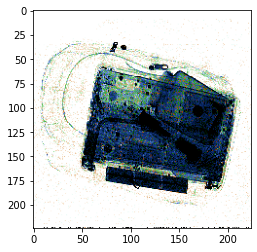

In [20]:
img_path = 'train/bags/xray_00091.png'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

## Создаем наборы данных

Набор данных для обучения

In [21]:
train_dataset = image_dataset_from_directory('train',
                                             batch_size=128,
                                             image_size=(224, 224))

Found 860 files belonging to 2 classes.


In [22]:
class_names = train_dataset.class_names

In [30]:
class_names

['bags', 'guns']

Набор данных для тестирования

In [29]:
test_dataset = image_dataset_from_directory('test',
                                             batch_size=128,
                                             image_size=(224, 224))

Found 310 files belonging to 2 classes.


## Создаем составную нейронную сеть

In [25]:
img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [26]:
inputs = layers.Input(shape=(224, 224, 3))
x = img_augmentation(inputs)
model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

# Freeze the pretrained weights
model.trainable = False

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
# Для задачи с двумя классами изображений
outputs = layers.Dense(1, activation="sigmoid", name="pred")(x)
# Для задачи с несколькими классами изображений
# num_classes = 3 # Задаем количество классов
# outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)
model = tf.keras.Model(inputs, outputs, name="EfficientNet")

16705208/16705208 [==============================] - 0s 0us/step


Компилируем составную нейронную сеть

In [27]:
# Для задачи с двумя классами изображений
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
# Для задачи с несколькими классами изображений
# model.compile(loss='categorical_crossentropy',
#              optimizer='adam', 
#              metrics=['accuracy'])

## Обучаем сеть

In [28]:
history = model.fit(train_dataset,
                    epochs=10)

Epoch 1/10


7/7 [==============================] - 41s 2s/step - loss: 0.7702 - accuracy: 0.5826
Epoch 2/10
7/7 [==============================] - 17s 2s/step - loss: 0.6084 - accuracy: 0.6942
Epoch 3/10
7/7 [==============================] - 18s 2s/step - loss: 0.5076 - accuracy: 0.7535
Epoch 4/10
7/7 [==============================] - 17s 2s/step - loss: 0.4483 - accuracy: 0.7977
Epoch 5/10
7/7 [==============================] - 18s 2s/step - loss: 0.4018 - accuracy: 0.8174
Epoch 6/10
7/7 [==============================] - 17s 2s/step - loss: 0.3735 - accuracy: 0.8453
Epoch 7/10
7/7 [==============================] - 17s 2s/step - loss: 0.3399 - accuracy: 0.8779
Epoch 8/10
7/7 [==============================] - 17s 2s/step - loss: 0.3314 - accuracy: 0.8535
Epoch 9/10
7/7 [==============================] - 17s 2s/step - loss: 0.2907 - accuracy: 0.8814
Epoch 10/10
7/7 [==============================] - 17s 2s/step - loss: 0.3047 - accuracy: 0.8791


Проверяем качество обучения на тестовом наборе данных


In [31]:
scores = model.evaluate(test_dataset, verbose=1)

3/3 [==============================] - 4s 521ms/step - loss: 0.4346 - accuracy: 0.8452


In [32]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 84.5161


## Использование нейронной сети для распознавания изображений

Вспоминаем номера классов

In [33]:
class_names

['bags', 'guns']

Загружаем изображение из файла

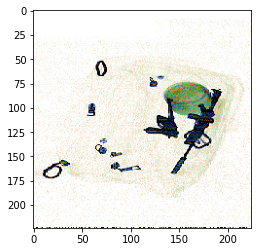

In [57]:
img_path = 'test/guns/xray_15488.png'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

Преобразуем изображение в массив

In [58]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

Запускаем распознавание

In [59]:
prediction = model.predict(x)

1/1 [==============================] - 0s 29ms/step


Печатаем результаты распознавания

In [60]:
prediction

array([[0.8980157]], dtype=float32)